# Import Data

In [1]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


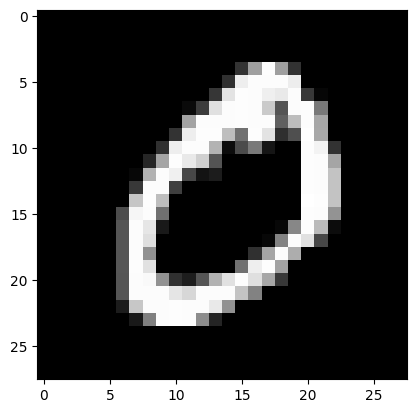

In [2]:
import matplotlib.pyplot as plt
sample = 1
image = X_train[sample]

fig = plt.figure
plt.imshow(image, cmap= 'gray')
plt.show()

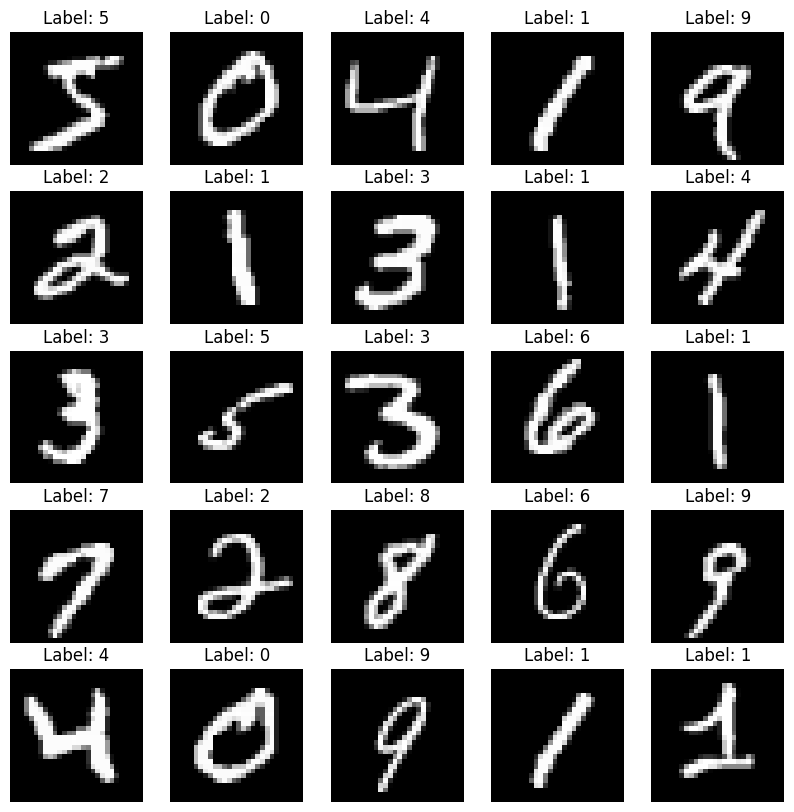

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

## Preprocessing

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

## Clustering dengan K-Means

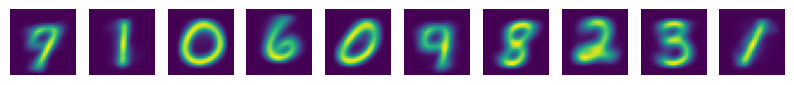

In [6]:
fig, axes = plt.subplots(1, num_clusters, figsize = (10,1))
for i, ax in enumerate(axes):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28,28))
    ax.axis("off")

plt.show()

In [11]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, random_state=42, algorithm='elkan')
kmeans.fit(X_train_flattened)
cluster_labels = kmeans.predict(X_test_flattened)

sil_score = silhouette_score(X_test_flattened, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

ari_score = adjusted_rand_score(y_test, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

nmi_score = normalized_mutual_info_score(y_test, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")



c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.0606
Adjusted Rand Index (ARI): 0.3667
Normalized Mutual Information (NMI): 0.4982


## Preprocessing dengan PCA dan Clustering dengan K-Means & Agglomerative Clustering

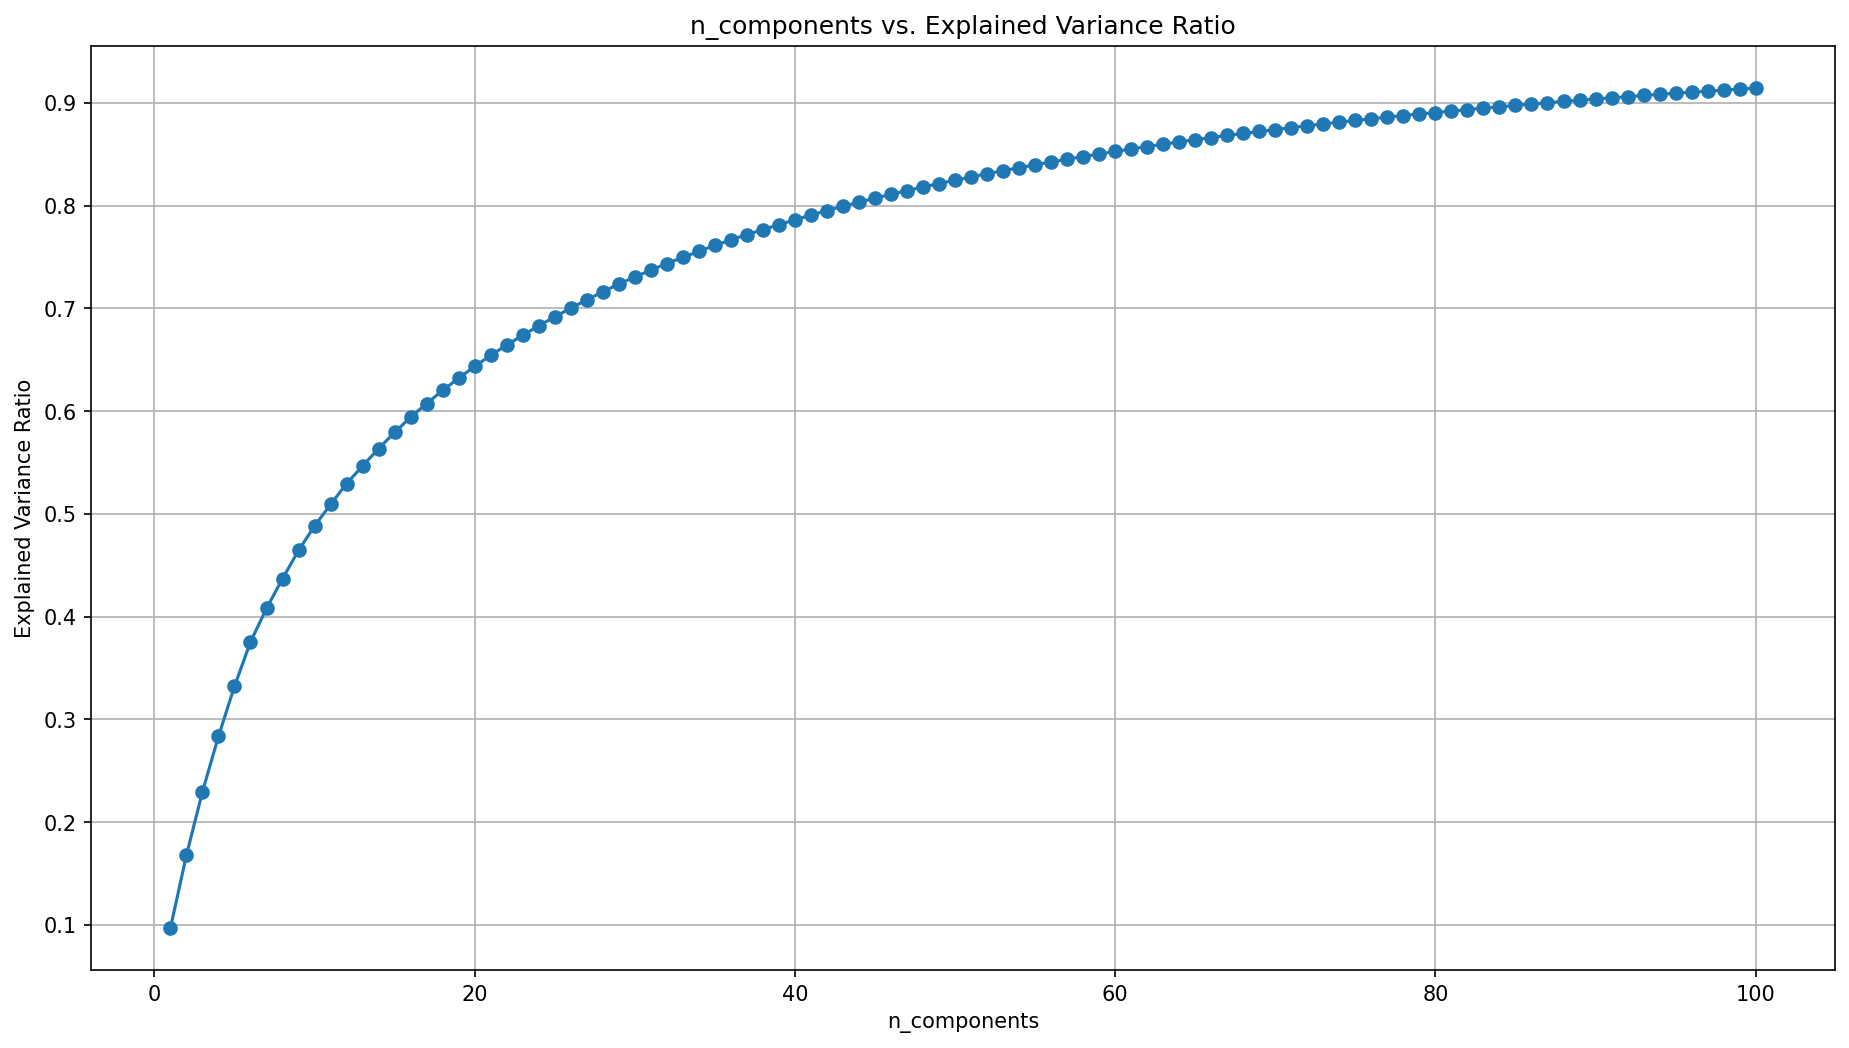

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=100)  
pca.fit(X_train_flattened)

var_ratio = np.cumsum(pca.explained_variance_ratio_)

nums = np.arange(1, len(var_ratio) + 1)

plt.figure(figsize=(15, 8), dpi=150)
plt.grid(True)
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained Variance Ratio')
plt.title('n_components vs. Explained Variance Ratio')
plt.show()


In [71]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import pandas as pd

num_clusters = 10

n_components_list = [12, 60, 100]

results = []

for n_components in n_components_list:
    print(f"Processing with PCA n_components={n_components}")
    
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_flattened)
    X_test_pca = pca.transform(X_test_flattened)

    kmeans = KMeans(n_clusters=num_clusters, n_init=20, random_state=42, init='k-means++')
    kmeans.fit(X_train_pca)

    cluster_labels = kmeans.predict(X_test_pca)

    sil_score = silhouette_score(X_test_pca, cluster_labels)

    ari_score = adjusted_rand_score(y_test, cluster_labels)

    nmi_score = normalized_mutual_info_score(y_test, cluster_labels)

    results.append({
        'PCA Components': n_components,
        'Silhouette Score': sil_score,
        'Adjusted Rand Index (ARI)': ari_score,
        'Normalized Mutual Information (NMI)': nmi_score
    })

results_df = pd.DataFrame(results)

results_df

Processing with PCA n_components=12
Processing with PCA n_components=60
Processing with PCA n_components=100


,PCA Components,Silhouette Score,Adjusted Rand Index (ARI),Normalized Mutual Information (NMI)
0,12,0.153876,0.343097,0.472626
1,60,0.081451,0.366535,0.497984
2,100,0.072179,0.366645,0.498985


In [61]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import pandas as pd

linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan', 'cosine']
num_clusters = 10  
subset_size = 5000  
X_train_subset = X_train_pca[:subset_size]
results = []

for linkage in linkages:
    for metric in metrics:
        if linkage == 'ward' and metric != 'euclidean':
            continue
        
        if metric == 'precomputed':
            distances = pairwise_distances(X_test_flattened, metric='euclidean')
            agglomerative = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage, metric='precomputed')
        else:
            agglomerative = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage, metric=metric)
        
        cluster_labels_agg = agglomerative.fit_predict(X_test_flattened)

        if len(set(cluster_labels_agg)) > 1:  
            sil_score_agg = silhouette_score(X_test_flattened, cluster_labels_agg)
        else:
            sil_score_agg = np.nan
        

        results.append({
            'Linkage': linkage,
            'Metric': metric,
            'Silhouette Score': sil_score_agg
        })

results_df = pd.DataFrame(results)
results_df

,Linkage,Metric,Silhouette Score
0,ward,euclidean,0.038524
1,complete,euclidean,0.034083
2,complete,manhattan,0.036279
3,complete,cosine,0.011204
4,average,euclidean,0.061674
5,average,manhattan,0.055533
6,average,cosine,-0.128949
7,single,euclidean,0.006476
8,single,manhattan,0.005410
9,single,cosine,-0.143144


## Preprocessing dengan UMAP dan Clustering dengan K-Means & Agglomerative Clustering

In [72]:
import umap
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans
import pandas as pd

num_clusters = 10
random_state = 42

n_components_list = [12, 60, 100]

results = []

for n_components in n_components_list:
    print(f"Processing with UMAP n_components={n_components}")
    
    umap_model = umap.UMAP(n_components=n_components, random_state=random_state)
    X_train_umap = umap_model.fit_transform(X_train_flattened)
    X_test_umap = umap_model.transform(X_test_flattened)

    kmeans = KMeans(n_clusters=num_clusters, n_init=20, random_state=random_state, init='k-means++')
    kmeans.fit(X_train_umap)

    cluster_labels = kmeans.predict(X_test_umap)

    sil_score = silhouette_score(X_test_umap, cluster_labels)

    ari_score = adjusted_rand_score(y_test, cluster_labels)

    nmi_score = normalized_mutual_info_score(y_test, cluster_labels)

    results.append({
        'UMAP Components': n_components,
        'Silhouette Score': sil_score,
        'Adjusted Rand Index (ARI)': ari_score,
        'Normalized Mutual Information (NMI)': nmi_score
    })

results_df = pd.DataFrame(results)

print(results_df)


Processing with UMAP n_components=12


c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Processing with UMAP n_components=60


c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Processing with UMAP n_components=100


c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


   UMAP Components  Silhouette Score  Adjusted Rand Index (ARI)  \
0               12          0.626986                   0.747191   
1               60          0.628308                   0.748436   
2              100          0.627114                   0.744419   

   Normalized Mutual Information (NMI)  
0                             0.821211  
1                             0.822017  
2                             0.819781  


In [67]:
import umap
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import pandas as pd

umap_model = umap.UMAP(n_components=60, random_state=42)
X_train_umap = umap_model.fit_transform(X_train_flattened)
X_test_umap = umap_model.transform(X_test_flattened)

linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan', 'cosine']
num_clusters = 10  
subset_size = 5000  
X_train_subset = X_train_umap[:subset_size]

results = []

for linkage in linkages:
    for metric in metrics:
        if linkage == 'ward' and metric != 'euclidean':
            continue
        
        if metric == 'precomputed':
            distances = pairwise_distances(X_test_umap, metric='euclidean')
            agglomerative = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage, affinity='precomputed')
        else:
            agglomerative = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage, affinity=metric)
        
        cluster_labels_agg = agglomerative.fit_predict(X_test_umap)

        if len(set(cluster_labels_agg)) > 1:  # Silhouette score tidak dapat dihitung jika hanya ada satu kluster
            sil_score_agg = silhouette_score(X_test_umap, cluster_labels_agg)
        else:
            sil_score_agg = np.nan

        results.append({
            'Linkage': linkage,
            'Metric': metric,
            'Silhouette Score': sil_score_agg
        })

results_df = pd.DataFrame(results)
results_df

c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `met

,Linkage,Metric,Silhouette Score
0,ward,euclidean,0.623798
1,complete,euclidean,0.595304
2,complete,manhattan,0.583696
3,complete,cosine,0.605956
4,average,euclidean,0.589916
5,average,manhattan,0.632817
6,average,cosine,0.589239
7,single,euclidean,0.330912
8,single,manhattan,0.365992
9,single,cosine,0.330912
